# Alignment statistics

Import required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

#### Data preparation

Read in samtools stats output files and populate dictonary

In [19]:
stats_dict = defaultdict(list)
for file in snakemake.input.stats:
    with open(file) as file:
        for line in file:
            line = line.strip('\n').split('\t')
            stats_dict[line[0]].append(float(line[1]))

Convert dictonary to pandas dataframe and rename rows

In [56]:
rename = {}
for num, name in enumerate(snakemake.params.datasetnames):
    rename[num] = name
    
stats = pd.DataFrame.from_dict(stats_dict)
stats = stats.rename(index=rename)

Take a look at the dataframe

In [57]:
stats

,raw total sequences:,filtered sequences:,sequences:,is sorted:,1st fragments:,last fragments:,reads mapped:,reads mapped and paired:,reads unmapped:,reads properly paired:,...,maximum first fragment length:,maximum last fragment length:,average quality:,insert size average:,insert size standard deviation:,inward oriented pairs:,outward oriented pairs:,pairs with other orientation:,pairs on different chromosomes:,percentage of properly paired reads (%):
stat_sum_T0.txt,667749.0,0.0,667749.0,1.0,667749.0,0.0,0.0,0.0,667749.0,0.0,...,15352.0,0.0,18.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stat_sum_T1.txt,1034134.0,0.0,1034134.0,0.0,1034134.0,0.0,1807.0,0.0,1032327.0,0.0,...,15148.0,0.0,17.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stat_sum_T2.txt,1136468.0,0.0,1136468.0,0.0,1136468.0,0.0,114943.0,0.0,1021525.0,0.0,...,18824.0,0.0,18.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stat_sum_T3.txt,1204078.0,0.0,1204078.0,0.0,1204078.0,0.0,612958.0,0.0,591120.0,0.0,...,21549.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stat_sum_T4.txt,1379487.0,0.0,1379487.0,0.0,1379487.0,0.0,922886.0,0.0,456601.0,0.0,...,15824.0,0.0,18.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
stat_sum_T5.txt,1372140.0,0.0,1372140.0,0.0,1372140.0,0.0,951228.0,0.0,420912.0,0.0,...,18323.0,0.0,17.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Plots

Set matplotlib settings

In [46]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

Plot read alignments

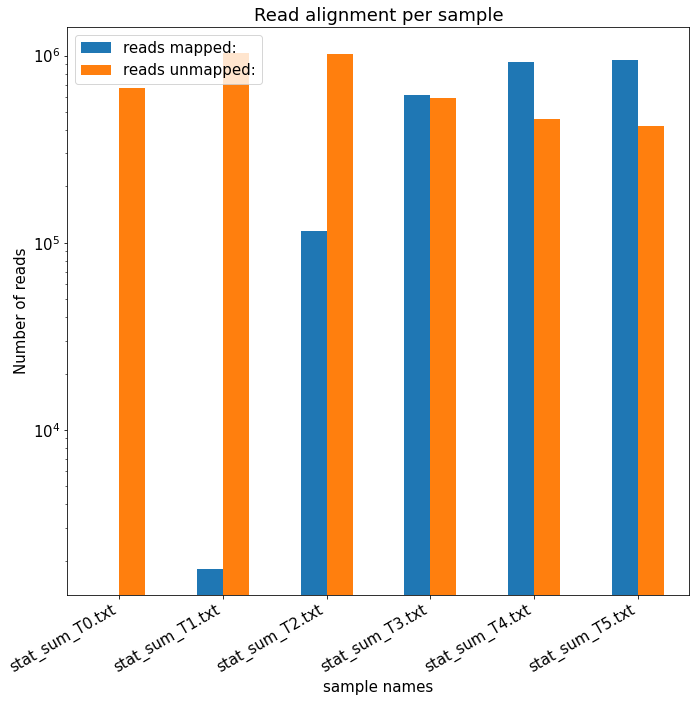

In [58]:
cols = ['reads mapped:', 'reads unmapped:']
stats[cols].plot(kind='bar')
plt.yscale('log')
plt.ylabel('Number of reads')
plt.xlabel('sample names')
plt.title('Read alignment per sample')
plt.xticks(rotation=30, ha='right')
plt.legend(loc='upper left')
plt.savefig(snakemake.output.align, dpi=200)

Plot mismatches

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'stat_sum_T0.txt'),
  Text(1, 0, 'stat_sum_T1.txt'),
  Text(2, 0, 'stat_sum_T2.txt'),
  Text(3, 0, 'stat_sum_T3.txt'),
  Text(4, 0, 'stat_sum_T4.txt'),
  Text(5, 0, 'stat_sum_T5.txt')])

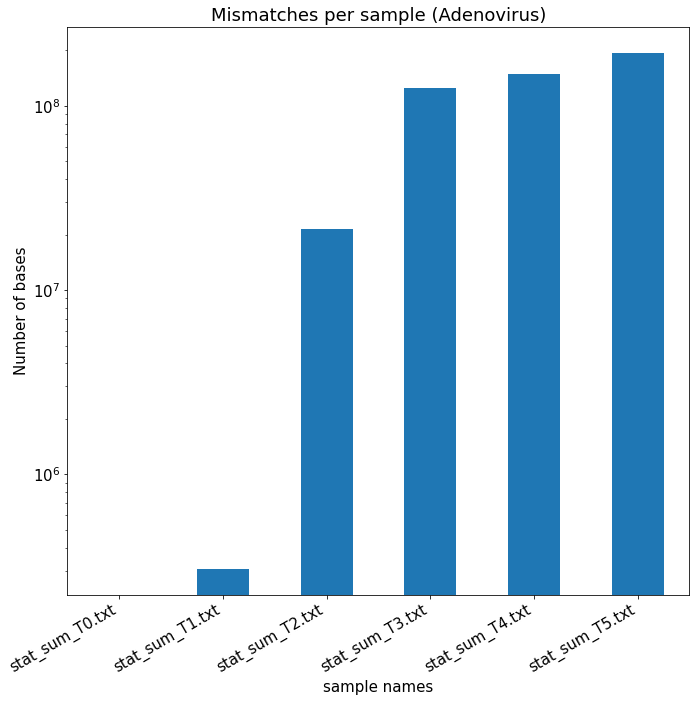

In [59]:
stats['mismatches:'].plot(kind='bar')
plt.yscale('log')
plt.ylabel('Number of bases')
plt.xlabel('sample names')
plt.title('Mismatches per sample (Adenovirus)')
plt.xticks(rotation=30, ha='right')
plt.savefig(snakemake.output.mismatch, dpi=200)

Plot average read length

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'stat_sum_T0.txt'),
  Text(1, 0, 'stat_sum_T1.txt'),
  Text(2, 0, 'stat_sum_T2.txt'),
  Text(3, 0, 'stat_sum_T3.txt'),
  Text(4, 0, 'stat_sum_T4.txt'),
  Text(5, 0, 'stat_sum_T5.txt')])

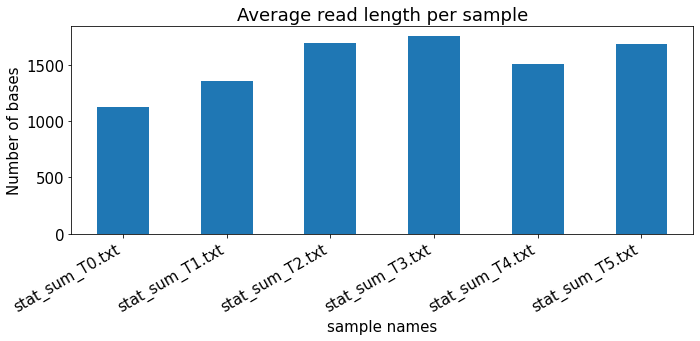

In [60]:
stats['average length:'].plot(kind='bar', figsize=(10, 5))
plt.ylabel('Number of bases')
plt.xlabel('sample names')
plt.title('Average read length per sample')
plt.xticks(rotation=30, ha='right')
plt.savefig(snakemake.output.readlen, dpi=200)